__Bei dieser Analyse geht es darum, zu zeigen, weshalb die Analyse der Residuen wichtig ist. Dies wird am Beispiel der Planeten in unserem Sonnensystem veranschaulicht.__

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt

Die X-Werte sind die Halbachse der Umlaufbahn der einzelnen Planeten um die Sonne. Eine Planetenbahn hat eine elliptische Form, und die Halbwertsachse ist die längere der beiden Achsen, die die Ellipse definieren.

Die Y-Werte sind die Umlaufzeit des Planeten, gemessen in Erdjahren (365,25 Tage), die Erde hat also auch 1 Jahr. 

In [2]:
X = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])
Y = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])
N = 9

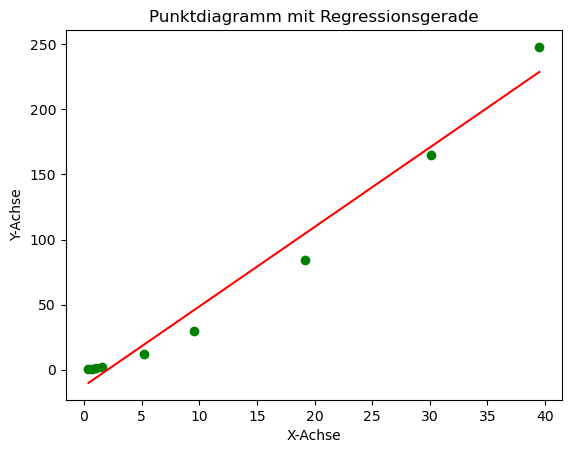

In [3]:
# Erzeugen eines Punktdiagramms
plt.scatter(X, Y, color='green')

# Erzeugen einer Regressionsgerade mit m=Steigung und b=Offset
m, b = np.polyfit(X, Y, 1)

# Beschriftung 
plt.title("Punktdiagramm mit Regressionsgerade")
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
# Die Regressionsgerade zum Punktdiagramm hinzufügen
plt.plot(X, m*X+b, color='red');

In [4]:
# Berechnung des Korrelationskoeffizienten 
scipy.stats.pearsonr(X, Y)[0]

0.9888323018726735

Bei einem derart hohen Korrelationskoeffizienten könnte man annehmen, dass die einer linearen Funktion folgen. Weshalb dies nicht der Fall ist, wird bei der Berechnung der Residuen gezeigt. 

__Berechnen der Residuen__

In [5]:
Y_pred = m*X+b
Residuen =Y-Y_pred

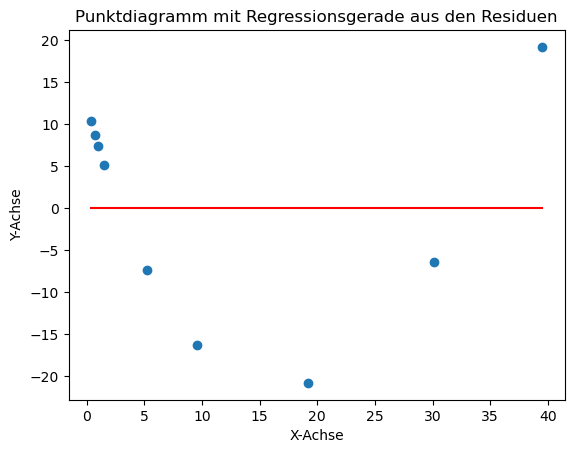

In [6]:
# Erzeugen eines Punktdiagramms
plt.scatter(x=X,y=Residuen)

# Erzeugen einer Regressionsgeraden aus den Residuen mit m=Steigung und b=Offset
m2, b2 = np.polyfit(X, Residuen, 1)

# Beschriftung 
plt.title("Punktdiagramm mit Regressionsgerade aus den Residuen")
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
# Die Regressionsgerade zum Punktdiagramm hinzufügen
plt.plot(X, m2*X+b2, color='red');

Unter der Annahme einer gaußverteilten Streuung müssten die Residuen eine "undefinierte" Punktwolke ergeben. Da sich eine quadratische Verteilung in die Punkte vermuten lässt, ist ein linearer Fit unpassend für die Daten.  

__Mathematisches Modell einer linearen Funktion mit gaußescher Streuung:__<br>
$f(x)=m\cdot x+b+N(0,{\sigma^2})$

Um den quadratischen Anteil aus den Daten zu bekommen, werden die Daten transformiert.

In [7]:
# Nichtlineare Transformation der Daten
X_ln = np.log(X)
Y_ln = np.log(Y)

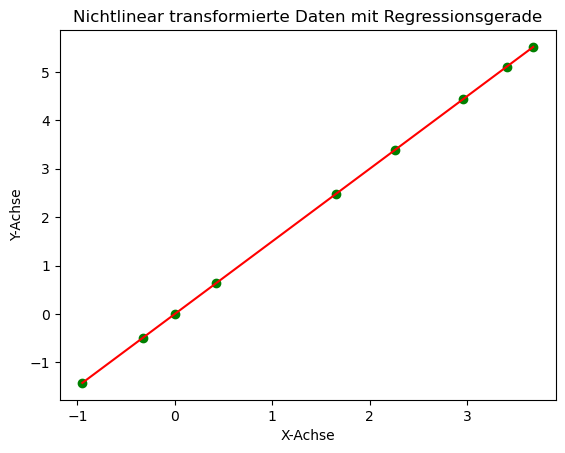

In [8]:
# Erzeugen eines Punktdiagramms
plt.scatter(x=X_ln, y=Y_ln, color='green')

# Erzeugen einer Regressionsgeraden aus den Residuen mit m=Steigung und b=Offset
m, b = np.polyfit(X_ln, Y_ln, 1)

# Beschriftung 
plt.title("Nichtlinear transformierte Daten mit Regressionsgerade")
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
# Die Regressionsgerade zum Punktdiagramm hinzufügen 
plt.plot(X_ln, m*X_ln+b, color='red')

In [9]:
# Berechnung des Korrelationskoeffizienten 
scipy.stats.pearsonr(X_ln, Y_ln)[0]

0.9999998085102118

In [10]:
Y_pred_ln = m*X_ln+b
Residuen_ln = Y_ln-Y_pred_ln

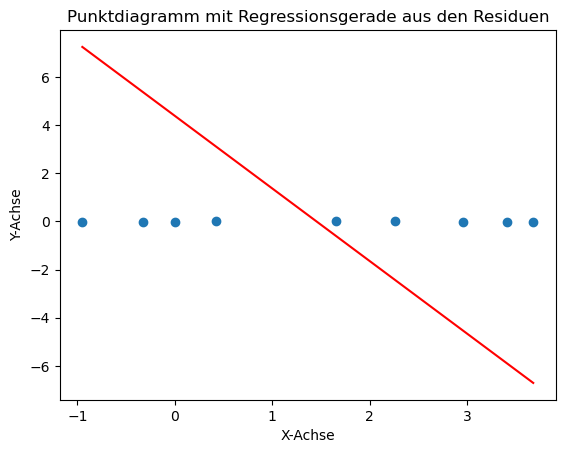

In [11]:
# Erzeugen eines Punktdiagramms
plt.scatter(x=X_ln,y=Residuen_ln)

# Erzeugen einer Regressionsgeraden aus den Residuen mit m=Steigung und b=Offset
m, b = np.polyfit(X_ln, Residuen, 1)

# Beschriftung 
plt.title("Punktdiagramm mit Regressionsgerade aus den Residuen")
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
# Die Regressionsgerade zum Punktdiagramm hinzufügen
plt.plot(X_ln, m*X_ln+b, color='red');

Nach der Transformation ergeben die Residuen eine "undefinierte" Punktwolke. Unter der Annahme einer gaußverteilten Streuung ist dies ein Ergebnis, dass man erwartet.

Wenn man die Daten rücktransformiert, ergibt sich für die folgende Gleichung: <br>
$f(x)=X^{3/2}*{\epsilon}$ <br>
Die Gleichung ist auch als [Kepler](https://de.wikipedia.org/wiki/Johannes_Kepler)'s drittes Gesetz bekannt. 

__Fazit: Durch die Analyse der Residuen hat sich gezeigt, dass die Daten keiner linearen Gleichung folgen.__